# JUPYTER NOTEBOOK FOR HOMEWORK 1
PART 1 - Sharpen a blurred colored image using a Gaussian filter

In [41]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy.ndimage.filters import convolve

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

#Create a Gaussian filter of n x n size and width sigma
def gaussian_filter(n, sigma):
    n = int(n) // 2
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2)))) / (2.0 * np.pi * sigma**2)
    return g
 
def extract(lab):
    L=[]
    for i in lab:
        tmp=[]
        for j in i:
            tmp.append(j[0])
        L.append(tmp)
    return L

def convolve(gfilter,L):
    
    start=len(gfilter)//2
    image=[[0 for _ in range(len(L[0])+start*2)]for _ in range(len(L)+start*2)]
    
    for i in range(start,len(image)-start):
        for j in range(start,len(image[0])-start):
            image[i][j]=L[i-start][j-start]

    simg=[[0 for _ in range(len(L[0]))] for _ in range(len(L))]
    g=np.matrix(gfilter)
    cut=np.matrix(image)
    
    for m in range(start,len(image)-start):
        for n in range(start,len(image[0])-start):
            tmp=cut[m-start:m+start+1,n-start:n+start+1]
            mid=np.multiply(g,tmp)
            total=np.sum(mid)
            simg[m-start][n-start]=total
    return simg
            
            
def normalize(matrix,maximum,minimum):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            matrix[i][j]=(matrix[i][j]-minimum)/(maximum-minimum)
            matrix[i][j] = matrix[i][j] * 100
    return matrix

def recombine(res,lab):
    for i in range(len(lab)):
        for j in range(len(lab[i])):
            lab[i][j][0]=res[i][j]
    return lab

        
#draw a circular patch on a color image Img; the patch is centered at r,c, with radius rad
#and color col (0-black; 1-red; 2-cyan; 3-green)
#Note that this function directly modifies Img. 
def draw_patch(Img, r, c, rad=7,col=1):   
    if col == 2:
        p = [0,1.0,1.0] #cyan
    else:
        p = [0,1.0,0.0] #green
    if col == 1: 
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black
        
    rr, cc = skimage.draw.circle(r, c, rad)
    Img[rr,cc, 0:3]= p       

        

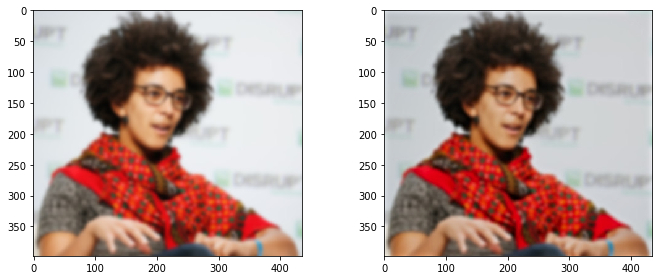

In [42]:
#1. Load your image of choice.
img = load_img('timnit_blur.jpg')

#2. Create a Gaussian filter here
'****Put your code here.'
gfilter=gaussian_filter(50,5)

#3. Next, convert your image to L.a.b. color scale
lab = skimage.color.rgb2lab(img)

#4. Extract the first channel to get the intensity-only image. Say this results in L
'****Put your code here.'
nL=extract(lab)

#5. Convolve this new image L with the filter g to get a smoothed image Simg
'****Put your code here.'
nSimg=convolve(gfilter,nL)


r=2
s=0.5
L=np.matrix(nL)
Simg=np.matrix(nSimg)
#6. Create a new image by multiplying L by a small constant r and Simg by another small constant s
L = r*L - s*Simg

minimum=np.min(L)
maximum=np.max(L)

newL=L.tolist()

            
#7. Normalize your new image so that its values are between 0 and 100
'****Put your code here.'
res=normalize(newL,maximum,minimum)


#8. Recombine this new L image with the previous a and b channels of the lab image in step #3.
'****Put your code here.'
lab2=recombine(res,lab)

#9. Reconvert the L.a.b. image back to RGB with the command below (assuming the new L.a.b. image is called lab2)
img2 = skimage.color.lab2rgb(lab2)

#10. Examine your newly sharpened image and save it to file. Also display the original and sharpened image side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(img2)
fig.tight_layout()
plt.show()



#### PART 2 - Implement Template Matching (Find Waldo)
Run the three different template matching algorithms discussed in class
1. cross-correlatios; 2. normalized cross-correlations and 3. sum-of-squared differences (SSD).
1. Convert the image to grayscale using rgb2gray
2. Write a function correlate to generate a correlation map
3. Find the location of the max point (is this Waldo?)
4. Next, implement NCC and SSD to determine if they find Waldo
5. Display your 3 resulting maps and location of max, max, min

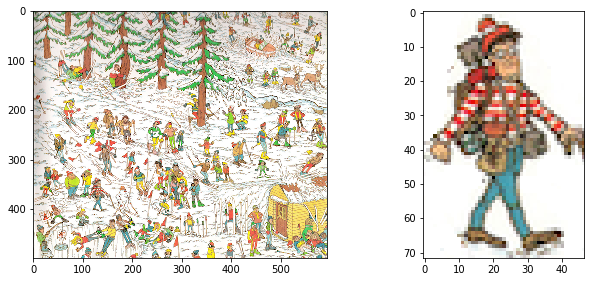

In [43]:
#1. Load the image and Waldo template
img1 = load_img('waldo_onIce.png')
temp1 = load_img('waldo_template.png')

#Convert the two images to grayscale
img = skimage.color.rgb2gray(img1)
temp = skimage.color.rgb2gray(temp1)


#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

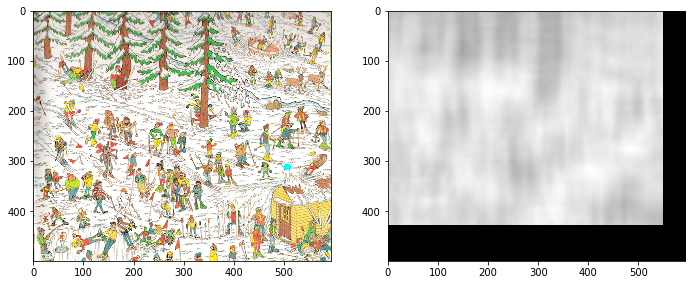

In [44]:
#2. Write and call a cross-correlation function to find the best match for Waldo
def crosscorr(Img, f):
    '****Put your code here.'
    row=len(f)//2
    col=len(f[0])//2
    
    simg=[[0 for _ in range(len(Img[0]))] for _ in range(len(Img))]
    g=np.matrix(f)
    cut=np.matrix(Img)

    for m in range(row,len(Img)-row):
        for n in range(col,len(Img[0])-col):
            if len(f)%2==0 and len(f[0])%2!=0: 
                tmp=cut[m-row:m+row,n-col:n+col+1]
            elif len(f)%2!=0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row+1,n-col:n+col]
            elif len(f)%2==0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row,n-col:n+col]
            else:
                tmp=cut[m-row:m+row+1,n-col:n+col+1]
            mid=np.multiply(g,tmp)
            total=np.sum(mid)
            simg[m-row][n-col]=total
          
            
    maximum=float("-inf")
    r,c=float("-inf"),float("-inf")
    for p in range(len(simg)):
        for q in range(len(simg[0])):
            if simg[p][q]>maximum:
                maximum=simg[p][q]
                r,c=p,q
    return r+row,c+col,simg
    
    
r,c,gray1=crosscorr(img,temp)

#3. Use the helper function 'draw_patch' to place a circular cyan patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the correlation map obtained alongside the image. 
# 
'****Put your code here.'
draw_patch(img1, r, c, rad=7,col=2)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(gray1,cmap='gray')
fig.tight_layout()
plt.show()

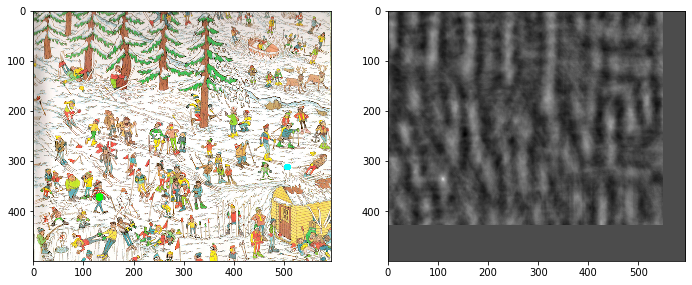

In [45]:
#4. Write and call a normalized cross-correlation function to find the best match for Waldo
def normcrosscorr(Img, f):
    '****Put your code here.'
    row=len(f)//2
    col=len(f[0])//2
         
    simg=[[0 for _ in range(len(Img[0]))] for _ in range(len(Img))]
    
    f_mean=np.mean(f)
    intermid=[[ (f[i][j]-f_mean)**2 for j in range(len(f[0]))]for i in range(len(f))]
    f_var=np.sqrt(np.sum(intermid))
    f=[[ (f[i][j]-f_mean)/f_var for j in range(len(f[0]))]for i in range(len(f))]
    
    
    g=np.matrix(f)
    cut=np.matrix(Img)
   
    for m in range(row,len(Img)-row):
        for n in range(col,len(Img[0])-col):
            if len(f)%2==0 and len(f[0])%2!=0: 
                tmp=cut[m-row:m+row,n-col:n+col+1]
            elif len(f)%2!=0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row+1,n-col:n+col]
            elif len(f)%2==0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row,n-col:n+col]
            else:
                tmp=cut[m-row:m+row+1,n-col:n+col+1]
            
            a=tmp.tolist()
            a_mean=np.mean(a)
            middle=[[ (a[i][j]-a_mean)**2 for j in range(len(a[0]))]for i in range(len(a))]
            a_var=np.sqrt(np.sum(middle))
            a=[[ (a[i][j]-a_mean)/a_var for j in range(len(a[0]))]for i in range(len(a))]
            tmp=np.matrix(a)
            
            mid=np.multiply(g,tmp)
            total=np.sum(mid)
            simg[m-row][n-col]=total
            
    maximum=float("-inf")
    r,c=float("-inf"),float("-inf")
    for p in range(len(simg)):
        for q in range(len(simg[0])):
            if simg[p][q]>maximum:
                maximum=simg[p][q]
                r,c=p,q
    return r+row,c+col,simg
    
r,c,gray2=normcrosscorr(img,temp)

#5. Again, use the helper function 'draw_patch' to place a circular green patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the normalized correlation map obtained alongside the image. 
# 
'****Put your code here.'
draw_patch(img1, r, c, rad=8,col=3)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(gray2,cmap='gray')
fig.tight_layout()
plt.show()

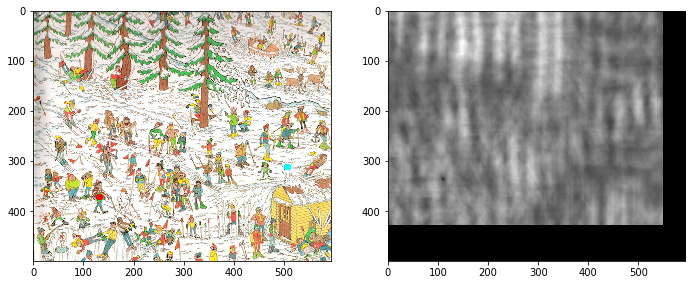

In [46]:
#6. Write and call an SSD function to find the best match for Waldo
def SSD(Img, f):
    '****Put your code here.'
    row=len(f)//2
    col=len(f[0])//2
            
    simg=[[0 for _ in range(len(Img[0]))] for _ in range(len(Img))]
    
    g=np.matrix(f)
    cut=np.matrix(Img)
    
    minimum=float("inf")
    r=float("inf")
    c=float("inf")
   
    for m in range(row,len(Img)-row):
        for n in range(col,len(Img[0])-col):
            if len(f)%2==0 and len(f[0])%2!=0: 
                tmp=cut[m-row:m+row,n-col:n+col+1]
            elif len(f)%2!=0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row+1,n-col:n+col]
            elif len(f)%2==0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row,n-col:n+col]
            else:
                tmp=cut[m-row:m+row+1,n-col:n+col+1]
            
            diff=np.subtract(tmp,g)
            intermid=diff.tolist()
            a=[[intermid[i][j]**2 for j in range(len(intermid[0]))]for i in range(len(intermid))]
            tmp=np.matrix(a)
            res=np.sum(tmp)
            if res<minimum:
                minimum=res
                r=m
                c=n
            
            mid=np.multiply(g,tmp)
            total=np.sum(mid)
            simg[m-row][n-col]=total
    return r,c,simg
    
r,c,gray3=SSD(img,temp)

#7. Lastly, use the helper function 'draw_patch' to place a circular red patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the SSD map obtained alongside the image. 
# 
'****Put your code here.'
draw_patch(img1, r, c, rad=7,col=1)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(gray3,cmap='gray')
fig.tight_layout()
plt.show()